In [ ]:
# import necessary packages and modules
import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats as st
import math , random

# for visualizing distributions
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# list of sample data for testing
sample = np.array([122.09, 100.64, 125.77, 120.32, 118.25,  96.47, 111.4 , 80.66,
       110.77, 111.14, 102.9 , 114.54,  88.09,  98.59,  87.07, 110.43,
       101.9 , 123.89,  97.03, 116.23, 108.3 , 112.82, 119.57, 131.38,
       128.39])


In [3]:
# Population mean (μ)
# (known from past data)
mu = 100
mu

100

In [4]:
# Sample mean (x̄) using NumPy array method mean()
x_bar = sample.mean()
x_bar

109.5456

In [5]:
# Sample standard deviation (sigma) using NumPy function std()
sigma = np.std(sample, ddof=1)
sigma

13.338774643871902

In [6]:
# Sample size (n)
n = len(sample)
n

25

In [7]:
# Degrees of Freedom
df = n-1
df

24

In [8]:
# Difference between sample mean and population mean
diff = x_bar - mu
diff

9.545599999999993

In [9]:
# Print the findings
print(f"""
The sample contains {n} observations, having a mean of {x_bar}
and a standard deviation (sigma) of {round(sigma,3)}, with {df} degrees of freedom.

The difference between sample and population means is {round(diff, 2)}.
""")

# The sample contains 25 observations, having a mean of 109.5456
# and a standard deviation (sigma) of 13.339, with 24 degrees of freedom.

# The difference between sample and population means is 9.55.


The sample contains 25 observations, having a mean of 109.5456
and a standard deviation (sigma) of 13.339, with 24 degrees of freedom.

The difference between sample and population means is 9.55.



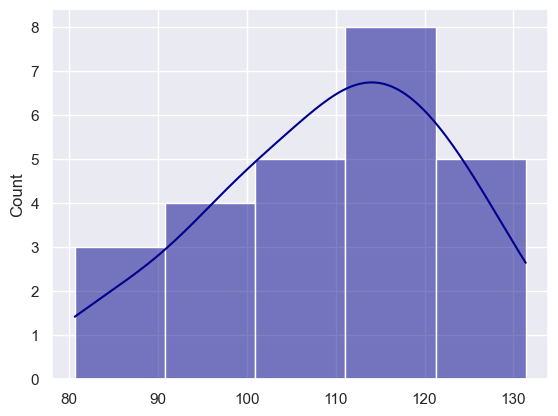

In [10]:
sns.set(color_codes=True)
sns.histplot(sample, kde=True, bins=5, color='darkblue');

In [11]:
t = (x_bar -  mu)/(sigma/np.sqrt(n))
t
# 3.578139767278185

3.578139767278185

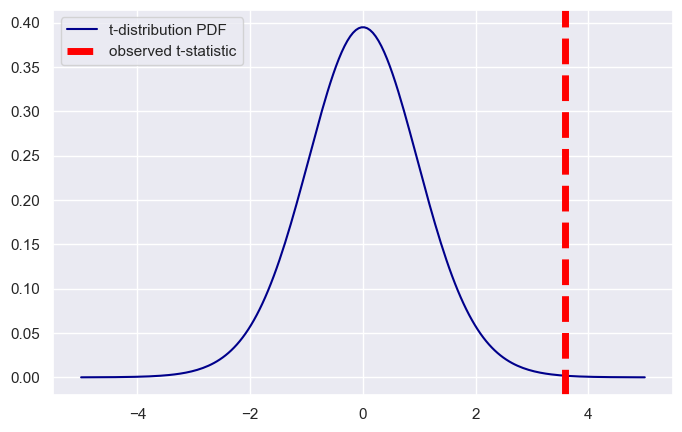

In [12]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(8,5))

# Generate data for plotting the PDF
# (1) generate points on the x axis between -5 and 5:
x = np.linspace(-5, 5, 200)
# (2) use stats.t.pdf to get values on the probability density
# function for the t-distribution
y = stats.t.pdf(x, df, 0, 1)

# Plot the PDF as a line graph
ax.plot(x, y, color='darkblue', label="t-distribution PDF")


# Plot a vertical line for our measured difference in sales t-statistic
ax.axvline(t, color='red', linestyle='--', lw=5,label='observed t-statistic')

ax.legend();
plt.show()


In [13]:
stats.t.cdf(1.711, df=24)

0.9500110459177917

In [14]:
t_crit = stats.t.ppf(1 - 0.05, df=24)
t_crit

1.7108820799094275

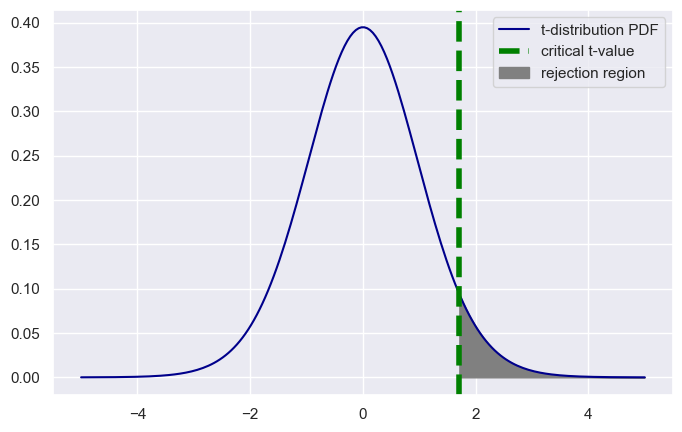

In [15]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(8,5))

# Plot the PDF as a line graph
# (x and y were created in previous plotting code)
ax.plot(x, y, color='darkblue', label="t-distribution PDF")

# Plot a vertical line for our critical t-value
ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')

# Fill area under line graph where x value is creater than critical t
ax.fill_betweenx(y,x,t_crit,where=x > t_crit,color="gray",label="rejection region")

ax.legend();

In [16]:
p_value = stats.t.sf(t, df=24)
p_value

0.0007589472707557043

In [17]:
results = stats.ttest_1samp(
    a=sample,   # the entire array-like sample
    popmean=100 # the mean you are testing the sample against
)

results

TtestResult(statistic=3.578139767278185, pvalue=0.0015178945415114085, df=24)

In [18]:
print(t)
print(results.statistic)

3.578139767278185
3.578139767278185


In [19]:
alpha = 0.05

t_crit = stats.t.ppf(1 - alpha, df=len(sample)-1)

if results.statistic > t_crit:
    print("Null hypothesis rejected.")
    print("The increase in sales performance is statistically significant at the", alpha, "level.")
else:
    print("Failed to reject the null hypothesis.")
    print("The increase in sales performance is not statistically significant at the", alpha, "level.")

Null hypothesis rejected.
The increase in sales performance is statistically significant at the 0.05 level.


In [20]:
print(p_value)
print(results.pvalue)

0.0007589472707557043
0.0015178945415114085


In [21]:
print(p_value)
print(results.pvalue / 2)

0.0007589472707557043
0.0007589472707557043


In [22]:
if (results.pvalue / 2) < alpha:
    print("Null hypothesis rejected.")
    print("The increase in sales performance is statistically significant at the", alpha, "level.")
else:
    print("Failed to reject the null hypothesis.")
    print("The increase in sales performance is not statistically significant at the", alpha, "level.")

Null hypothesis rejected.
The increase in sales performance is statistically significant at the 0.05 level.


In [23]:
print("results.statistic:", results.statistic)
print("results[0]:       ", results[0])
print("results.pvalue:   ", results.pvalue)
print("results[1]:       ", results[1])

results.statistic: 3.578139767278185
results[0]:        3.578139767278185
results.pvalue:    0.0015178945415114085
results[1]:        0.0015178945415114085


# testing an unfair coin 


In [24]:
n = 20 #Number of flips
p = .75 #Simulating an unfair coin
coin1 = np.random.binomial(n, p)
coin1


15

In [25]:
sigma = np.sqrt(n*.5*(1-.5))
sigma

2.23606797749979

In [26]:
z = (coin1 - 10) / (sigma / 1)
z

2.23606797749979

In [27]:
st.norm.sf(np.abs(z))

0.012673659338734126

In [28]:
sns.set_style('darkgrid')


Text(0.5, 0, 'Number of Coin Flips')

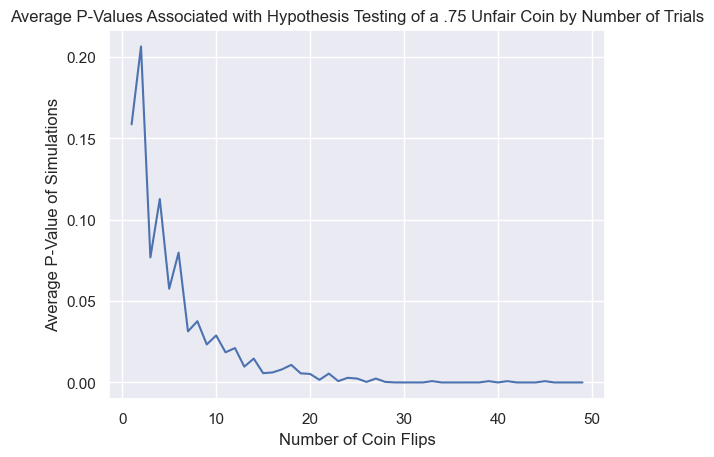

In [29]:
#How many times would you have to flip a 75% heads coin to determine it was false?
p_vals = []
#Iterate through various numbers of trials
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        p = .75 # Simulating an unfair coin
        n_heads = np.random.binomial(n, p)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5))
        z  = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.sf(np.abs(z)))
    p_vals.append(np.mean(p_val))
plt.plot(list(range(1,50)), p_vals)
plt.title('Average P-Values Associated with Hypothesis Testing of a .75 Unfair Coin by Number of Trials')
plt.ylabel('Average P-Value of Simulations')
plt.xlabel('Number of Coin Flips')

In [32]:
sns.set(color_codes=True)


<Axes: ylabel='Count'>

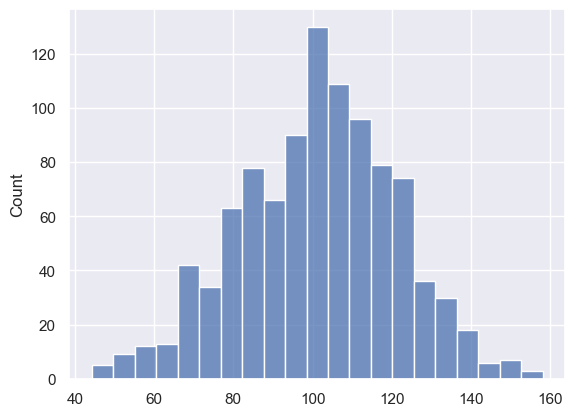

In [34]:
# Create a population with mean=100 and sd=20 and size = 1000
pop = np.random.normal(100, 20, 1000)
pop.dtype
sns.histplot(pop)

In [35]:
k = 100
sample1 = np.random.choice(pop,100,replace=True)

print ("Sample 1 Summary")
stats.describe(sample1)

Sample 1 Summary


DescribeResult(nobs=100, minmax=(59.16705467593066, 136.90997615052075), mean=96.60794815979747, variance=311.38550134230843, skewness=-0.1374847967338579, kurtosis=-0.8158525789754245)

In [36]:
sample2 = np.random.choice(pop,100,replace=True)
print ("Sample 2 Summary")
stats.describe(sample2)

Sample 2 Summary


DescribeResult(nobs=100, minmax=(45.05610441699254, 137.04555675806048), mean=98.93229136077342, variance=348.4690592762171, skewness=-0.33903104330438105, kurtosis=-0.03109303724851875)

In [37]:
# test the sample means
stats.ttest_ind(sample1, sample2)

TtestResult(statistic=-0.9048490668987785, pvalue=0.3666450280140042, df=198.0)

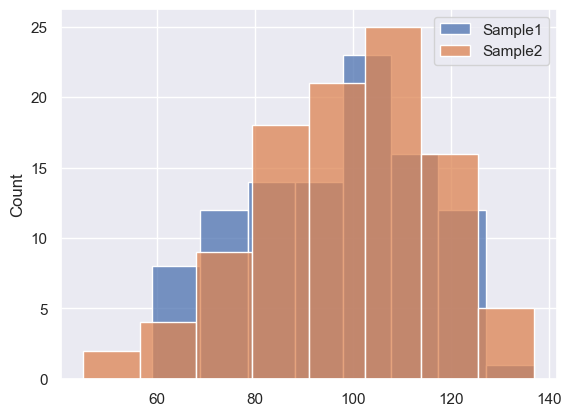

In [39]:
plt.figure("Test Samples")
sns.histplot(sample1, label='Sample1') 
sns.histplot(sample2, label='Sample2')
plt.legend()
plt.show()


In [40]:
def type_1_error(population, num_tests, alpha_set):
    """
    Parameters
    ----------
    population: ndarray
        A random normal distribution
    num_tests: int
        The number of hypothesis tests to be computed
    alpha_set: list
        List of alpha levels
    
    Returns
    ----------
    sig_tests : DataFrame
        A dataframe containing the columns 'type_1_error', 'p_value', and 'alpha'
    """
    pass
# Example dataframe for 1 test below

In [44]:
def type_2_error(population, population_2, num_tests, alpha_set):
    
    """
    Parameters
    ----------
    population: ndarray
        A random normal distribution
    population_2: ndarray
        A different random normal distribution
    num_tests: int
        The number of hypothesis tests to be computed
    alpha_set: list
        List of alpha levels
    
    Returns
    ----------
    sig_tests : DataFrame
        A dataframe containing the columns 'type_2_error', 'p_value', and 'alpha'
    """
    pass
# Example dataframe for 1 test below